# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [307]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [308]:
# Read the Mapbox API key
load_dotenv("sample.env")
map_box_api = os.getenv("mapbox")

## Load Data

In [309]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [310]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_grp = sfo_data['housing_units'].groupby('year').mean()
sfo_data_grp.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

In [311]:
# Save the dataframe as a csv file
sfo_data_grp.to_csv()

'2010,372560\n2011,374507\n2012,376454\n2013,378401\n2014,380348\n2015,382295\n2016,384242\n'

Text(0, 0.5, 'Housing Units')

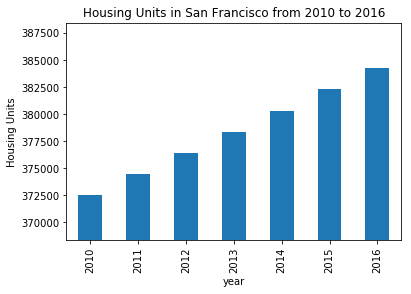

In [313]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
min = sfo_data_grp.min()
max = sfo_data_grp.max()
std = sfo_data_grp.std()
sfo_data_grp.plot(
    kind='bar',
    title='Housing Units in San Francisco from 2010 to 2016',
    ylim=(min-std, max+std)
)
plt.ylabel('Housing Units')

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [314]:
# Calculate the average sale price per square foot and average gross rent
sfo_data_sale_rent = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()
sfo_data_sale_rent.head()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528


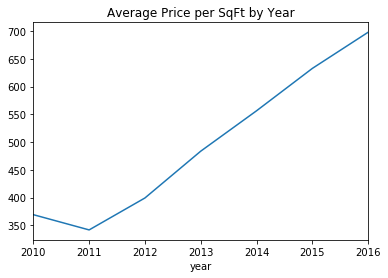

In [315]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sale_plot = sfo_data_sale_rent['sale_price_sqr_foot'].plot(title="Average Price per SqFt by Year")

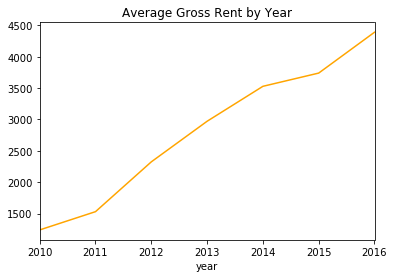

In [316]:
# Line chart for average montly rent
rent_plot = sfo_data_sale_rent['gross_rent'].plot(title="Average Gross Rent by Year", color='Orange')

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [255]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_hood = sfo_data[['neighborhood', 'sale_price_sqr_foot', 'gross_rent', 'housing_units']].groupby(
    ['year', 'neighborhood']).mean().reset_index()
sfo_hood.head()

,year,neighborhood,sale_price_sqr_foot,gross_rent,housing_units
0,2010,Alamo Square,291.182945,1239,372560
1,2010,Anza Vista,267.932583,1239,372560
2,2010,Bayview,170.098665,1239,372560
3,2010,Buena Vista Park,347.394919,1239,372560
4,2010,Central Richmond,319.027623,1239,372560


In [256]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sfo_hood.hvplot(x="year", y="sale_price_sqr_foot", xlabel="Year", ylabel="Avg Sale Price per Square Foot", groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [317]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
sfo_hood.hvplot(x="year", y="gross_rent", xlabel="Year", ylabel="Avg Gross Rent per Year", groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [319]:
# Getting the data from the top 10 expensive neighborhoods to own
# Note I've selected 2016 values only as it seems most relevant
sfo_2016 = sfo_hood[sfo_hood['year'] == 2016].sort_values('sale_price_sqr_foot', ascending=False).reset_index()

# Drop extra index column
sfo_2016.drop(columns='index', inplace=True)

# Select top-10 most expensive
sfo_2016_10 = sfo_2016.iloc[0:10]
sfo_2016_10

,year,neighborhood,sale_price_sqr_foot,gross_rent,housing_units
0,2016,Presidio Heights,1465.968586,4390,384242
1,2016,Merced Heights,1416.666667,4390,384242
2,2016,Parnassus/Ashbury Heights,1207.997485,4390,384242
3,2016,Outer Richmond,1196.645437,4390,384242
4,2016,Cow Hollow,1059.065602,4390,384242
5,2016,Eureka Valley/Dolores Heights,1026.791108,4390,384242
6,2016,Russian Hill,1024.339877,4390,384242
7,2016,Pacific Heights,996.389364,4390,384242
8,2016,Bernal Heights,986.842105,4390,384242
9,2016,Twin Peaks,970.085470,4390,384242


In [320]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_2016_10.hvplot(kind='bar', title='Top 10 Most Expensive Neighborhoods in SFO in 2016', 
                x='neighborhood', 
                y="sale_price_sqr_foot", 
                xlabel="Neighborhood", 
                ylabel="Avg Sales Price per Square Foot", 
                width=700, 
                height=500, 
                rot=90
               )

:Bars   [neighborhood]   (sale_price_sqr_foot)

# The Judge's Panel

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [260]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_hood.head(10)

,year,neighborhood,sale_price_sqr_foot,gross_rent,housing_units
0,2010,Alamo Square,291.182945,1239,372560
1,2010,Anza Vista,267.932583,1239,372560
2,2010,Bayview,170.098665,1239,372560
3,2010,Buena Vista Park,347.394919,1239,372560
4,2010,Central Richmond,319.027623,1239,372560
5,2010,Central Sunset,418.172493,1239,372560
6,2010,Corona Heights,369.359338,1239,372560
7,2010,Cow Hollow,569.379968,1239,372560
8,2010,Croker Amazon,165.645730,1239,372560
9,2010,Diamond Heights,456.930822,1239,372560


In [321]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_hood.hvplot(
    kind='bar',
    x='year',
    y=['gross_rent', 'sale_price_sqr_foot'],
    title='Sales Prices and Rent 2010-2016 per Neighborhood',
    xlabel="Year", 
    ylabel="Gross Rent/Sale Price per Square Foot", 
    rot=90,
    width=700, 
    height=500, 
    groupby='neighborhood'
)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [322]:
# Load neighborhoods coordinates data
csvpath = Path("Data/neighborhoods_coordinates.csv")
coord_df = pd.read_csv(csvpath, index_col='Neighborhood')
coord_df.head(12)

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
Buena Vista Park,37.768160,-122.439330
Central Richmond,37.777890,-122.445170
Central Sunset,37.749610,-122.489990
Clarendon Heights,37.753310,-122.447030


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [323]:
# Calculate the mean values for each neighborhood
# I'm using the latest 2016 values instead of mean values as I believe this to be more useful

sfo_2016.set_index('neighborhood', inplace=True)
sfo_2016

,year,sale_price_sqr_foot,gross_rent,housing_units
neighborhood,,,,
Presidio Heights,2016,1465.968586,4390,384242
Merced Heights,2016,1416.666667,4390,384242
Parnassus/Ashbury Heights,2016,1207.997485,4390,384242
Outer Richmond,2016,1196.645437,4390,384242
Cow Hollow,2016,1059.065602,4390,384242
Eureka Valley/Dolores Heights,2016,1026.791108,4390,384242
Russian Hill,2016,1024.339877,4390,384242
Pacific Heights,2016,996.389364,4390,384242
Bernal Heights,2016,986.842105,4390,384242


In [324]:
# Join the average values with the neighborhood locations
join_df = pd.concat([coord_df, sfo_2016], join='inner', axis=1).dropna()

,Lat,Lon,year,sale_price_sqr_foot,gross_rent,housing_units
count,42.000000,42.000000,42.0,42.000000,42.0,42.0
mean,37.761116,-122.442955,2016.0,678.373870,4390.0,384242.0
std,0.026546,0.027510,0.0,320.187068,0.0,0.0
min,37.719930,-122.489990,2016.0,40.772625,4390.0,384242.0
25%,37.734150,-122.457000,2016.0,512.460843,4390.0,384242.0
50%,37.759545,-122.441190,2016.0,642.100609,4390.0,384242.0
75%,37.785530,-122.435790,2016.0,897.041581,4390.0,384242.0
max,37.800550,-122.383240,2016.0,1465.968586,4390.0,384242.0


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

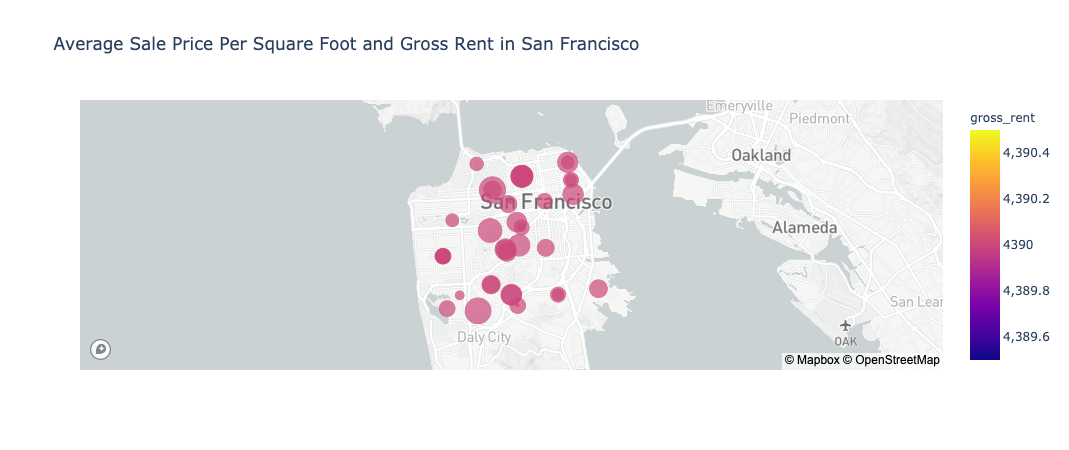

In [325]:
# Set the mapbox access token
# Read the Mapbox API key

px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    join_df,
    lat='Lat',
    lon='Lon',
    size='sale_price_sqr_foot',
    color='gross_rent',
    zoom=10,
    title = 'Average Sale Price Per Square Foot and Gross Rent in San Francisco'
)
map_plot

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [326]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = sfo_hood[sfo_hood["neighborhood"].isin(sfo_2016_10["neighborhood"])].reset_index(drop=True)
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,gross_rent,housing_units
0,2010,Cow Hollow,569.379968,1239,372560
1,2010,Eureka Valley/Dolores Heights,403.118313,1239,372560
2,2010,Outer Richmond,338.126200,1239,372560
3,2010,Pacific Heights,496.516014,1239,372560
4,2010,Parnassus/Ashbury Heights,434.255004,1239,372560


In [329]:
# calculate mean across years
df_expensive_neighborhoods_per_year_grp = df_expensive_neighborhoods_per_year.groupby(by='neighborhood')[
    'sale_price_sqr_foot', 'gross_rent', 'housing_units'].mean().reset_index()
df_expensive_neighborhoods_per_year_grp

,neighborhood,sale_price_sqr_foot,gross_rent,housing_units
0,Bernal Heights,576.746488,3080.333333,379374.5
1,Cow Hollow,665.964042,2817.285714,378401.0
2,Eureka Valley/Dolores Heights,642.248671,2817.285714,378401.0
3,Merced Heights,788.844818,3414.000000,380348.0
4,Outer Richmond,473.900773,2817.285714,378401.0
5,Pacific Heights,689.555817,2817.285714,378401.0
6,Parnassus/Ashbury Heights,632.740454,2817.285714,378401.0
7,Presidio Heights,675.350212,2817.285714,378401.0
8,Russian Hill,608.983217,2817.285714,378401.0
9,Twin Peaks,469.398626,2817.285714,378401.0


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


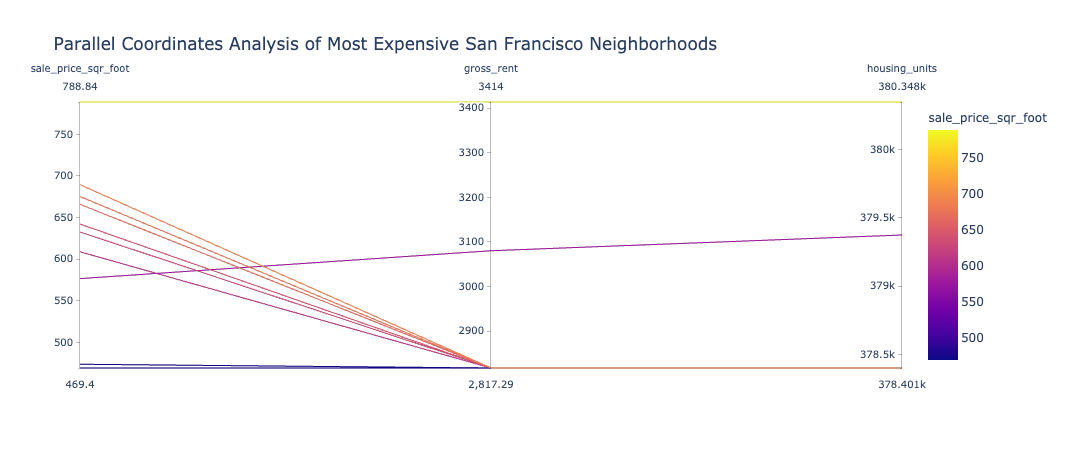

In [330]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    data_frame=df_expensive_neighborhoods_per_year_grp,
    color='sale_price_sqr_foot',
    title='Parallel Coordinates Analysis of Most Expensive San Francisco Neighborhoods',
)

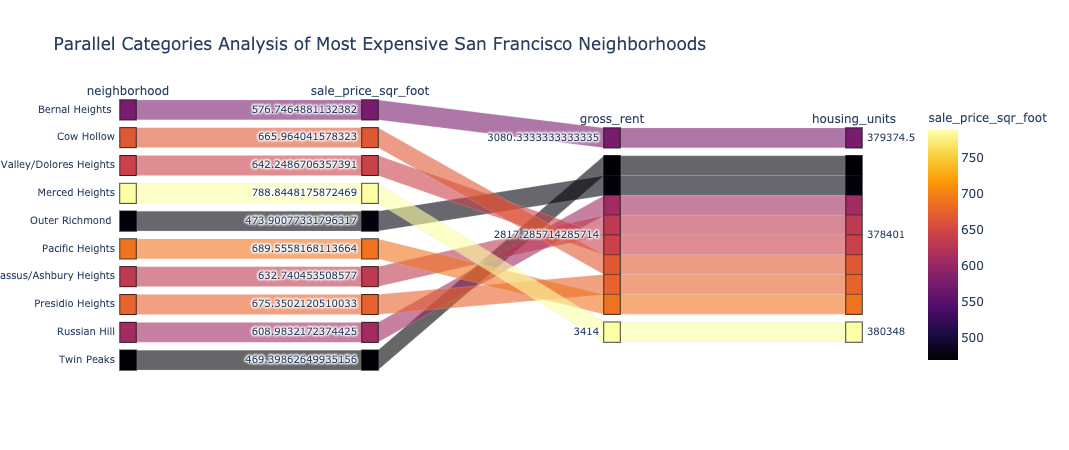

In [331]:
# Parallel Categories Plot
px.parallel_categories(
    data_frame=df_expensive_neighborhoods_per_year_grp,
    color='sale_price_sqr_foot',
    title='Parallel Categories Analysis of Most Expensive San Francisco Neighborhoods',
    color_continuous_scale=px.colors.sequential.Inferno,
    dimensions_max_cardinality=50,
)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

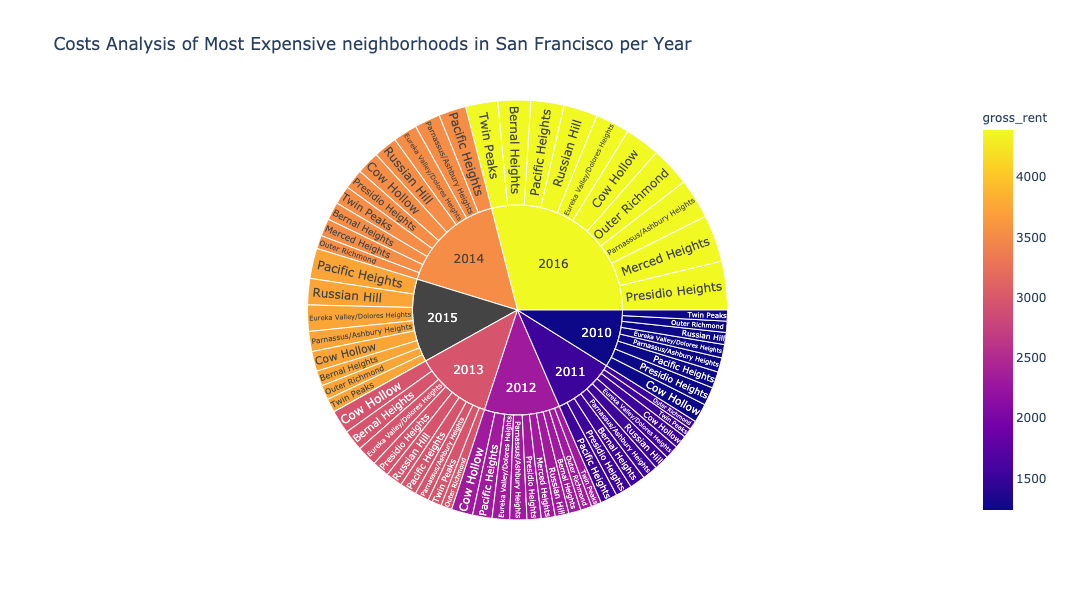

In [332]:
# Sunburst Plot
fig = px.sunburst(
    df_expensive_neighborhoods_per_year,
    path=['year', 'neighborhood'],
    values='sale_price_sqr_foot',
    color='gross_rent',
    title='Costs Analysis of Most Expensive neighborhoods in San Francisco per Year',
    width=800,
    height=600,
)
fig.show()